# 16년 17년 자료

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

In [2]:

df = pd.read_csv("../data/2016-2017gsouth.csv", thousands=',', encoding='euc-kr')
df1 = pd.read_csv("../data/2016-2017gsouthseek.csv", thousands=',', encoding='euc-kr')
df2 = pd.read_csv("../data/2016-2017ojeon.csv", thousands=',', encoding='euc-kr')
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0


In [3]:
df = pd.merge(df, df1, on="일시")
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),시도지역코드,발생건수(건)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9,경남,744
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5,경남,3985
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6,경남,2263
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8,경남,193
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0,경남,4042


In [4]:
del df['시도지역코드']

In [5]:
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),발생건수(건)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9,744
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5,3985
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6,2263
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8,193
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0,4042


In [6]:
df = pd.merge(df, df2, on="일시")
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),발생건수(건),평균 오존전량(DU)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9,744,354.9
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5,3985,365.5
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6,2263,373.2
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8,193,339.8
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0,4042,269.9


In [7]:
df['최고기온(°C)'] = df['최고기온(°C)'] - df['최저기온(°C)']  
df.rename(columns={ df.columns[0] : '지점',
                    df.columns[1] : '일시',
                    df.columns[2] : '평균기온',
                    df.columns[3] : '최저기온',
                    df.columns[4] : '일교차',
                    df.columns[5] : '최소상대습도',
                    df.columns[6] : '기압',
                    df.columns[7] : '환자수',
                    df.columns[8] : '오존량'},inplace=True)
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량
0,경상남도,2016-01-01,-3.1,-8.1,9.0,19.0,1018.9,744,354.9
1,경상남도,2016-01-02,-3.3,-9.5,13.4,30.0,1020.5,3985,365.5
2,경상남도,2016-01-03,-3.0,-11.0,17.8,15.0,1019.6,2263,373.2
3,경상남도,2016-01-04,0.4,-6.6,18.8,35.0,1014.8,193,339.8
4,경상남도,2016-01-05,2.7,-5.3,16.3,38.0,1014.0,4042,269.9


In [8]:
df['최저기온위험지수'] = 'NaN'
df['일교차위험지수'] = 'NaN'
df['습도위험지수'] = 'NaN'
df['오존위험지수'] = 'NaN'
df['기압위험지수'] = 'NaN'
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경상남도,2016-01-01,-3.1,-8.1,9.0,19.0,1018.9,744,354.9,NaN,NaN,NaN,NaN,NaN
1,경상남도,2016-01-02,-3.3,-9.5,13.4,30.0,1020.5,3985,365.5,NaN,NaN,NaN,NaN,NaN
2,경상남도,2016-01-03,-3.0,-11.0,17.8,15.0,1019.6,2263,373.2,NaN,NaN,NaN,NaN,NaN
3,경상남도,2016-01-04,0.4,-6.6,18.8,35.0,1014.8,193,339.8,NaN,NaN,NaN,NaN,NaN
4,경상남도,2016-01-05,2.7,-5.3,16.3,38.0,1014.0,4042,269.9,NaN,NaN,NaN,NaN,NaN


In [9]:
#습도는 절대값으로 한다.
for i in df.index:
    if df.values[i,5] >62.5:
        df['습도위험지수'].values[i] = '1'
    elif 62.5<= df.values[i,5] <44.5:
        df['습도위험지수'].values[i] = '2'
    elif 44.5<= df.values[i,5] <30.3:
        df['습도위험지수'].values[i] = '3'
    else:
        df['습도위험지수'].values[i] = '4'
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경상남도,2016-01-01,-3.1,-8.1,9.0,19.0,1018.9,744,354.9,NaN,NaN,4,NaN,NaN
1,경상남도,2016-01-02,-3.3,-9.5,13.4,30.0,1020.5,3985,365.5,NaN,NaN,4,NaN,NaN
2,경상남도,2016-01-03,-3.0,-11.0,17.8,15.0,1019.6,2263,373.2,NaN,NaN,4,NaN,NaN
3,경상남도,2016-01-04,0.4,-6.6,18.8,35.0,1014.8,193,339.8,NaN,NaN,4,NaN,NaN
4,경상남도,2016-01-05,2.7,-5.3,16.3,38.0,1014.0,4042,269.9,NaN,NaN,4,NaN,NaN


In [10]:
for i in df.index:        
    if df.values[i,4] < 8.6 : 
        df['일교차위험지수'].values[i] = '1' 
    elif 8.6<= df.values[i,4] < 12.3: 
        df['일교차위험지수'].values[i] = '2'  
    elif 12.3<=df.values[i,4] < 15.8:  
        df['일교차위험지수'].values[i] = '3'  
    elif 15.8<= df.values[i,4] : 
        df['일교차위험지수'].values[i] = '4' 
            
    if df.values[i,3] <-7.7 or 30<=df.values[1,3]: 
        df['최저기온위험지수'].values[i] = '4' 
    elif -7.7<=df.values[i,3] <-0.5:
        df['최저기온위험지수'].values[i] = '3' 
    elif -0.5<=df.values[i,3] < 12.6:
        df['최저기온위험지수'].values[i] = '2'  
    elif 12.6<=df.values[i,3] <30:
        df['최저기온위험지수'].values[i] = '1'  

In [11]:
for i in df.index:        
    if df.values[i,6] < 1007.6 : 
        df['기압위험지수'].values[i] = '1' 
    elif 1007.6<= df.values[i,6] < 1016.2: 
        df['기압위험지수'].values[i] = '2'  
    elif 1016.2<=df.values[i,6] < 1022.1:  
        df['기압위험지수'].values[i] = '3'  
    elif 1022.1<= df.values[i,6] : 
        df['기압위험지수'].values[i] = '4' 

In [12]:
for i in df.index:
    if df.values[i,8] < 310.8:
        df['오존위험지수'].values[i] = '1'
    elif 310.8<=df.values[i,8] < 348.2:
        df['오존위험지수'].values[i] = '2'
    elif 348.2<=df.values[i,8] < 399.2:
        df['오존위험지수'].values[i] = '3'
    elif 399.2<= df.values[i,8]:
        df['오존위험지수'].values[i] = '4'  


In [13]:
df['최소상대습도'] = 100 - df['최소상대습도']
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경상남도,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3
1,경상남도,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3
2,경상남도,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3
3,경상남도,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2
4,경상남도,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2


# 일교차, 습도, 오존량, 기압, 최저

In [14]:
temr = df['일교차'].corr(df['환자수'])
hum = df['최소상대습도'].corr(df['환자수'])
oj = df['오존량'].corr(df['환자수'])
atm = df['기압'].corr(df['환자수'])
mtem = -df['최저기온'].corr(df['환자수'])
al = temr+hum+oj+mtem+atm

temr,hum,oj,mtem,atm

(0.08306324817923076,
 0.11737740817457412,
 0.13388110295274022,
 0.27933315600963415,
 0.23642140376414064)

In [15]:
temr = temr/al
hum = hum/al
oj = oj/al
atm = atm/al
mtem = mtem/al

temr, hum, oj, atm, mtem

(0.0977126951014177,
 0.13807867074989494,
 0.1574930390927528,
 0.2781178565471864,
 0.3285977385087482)

In [16]:
df['ALI'] = float('NaN')
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI
0,경상남도,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,NaN
1,경상남도,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,NaN
2,경상남도,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,NaN
3,경상남도,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,NaN
4,경상남도,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,NaN


In [17]:
#temr, hum, oj, atm, mtem
#일교차, 습도, 오존, 기압, 최저기온
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+temr*float(df.values[i,10])+hum*float(df.values[i,11])+oj*float(df.values[i,12])+ atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI
0,경상남도,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,3.368964
1,경상남도,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,3.466676
2,경상남도,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,3.564389
3,경상남도,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,2.800180
4,경상남도,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,2.642687


In [18]:
df.to_csv("../data/경남2.csv", encoding='utf-8', sep=',') 

In [19]:
la = pd.read_csv("../data/2016-2017gsouthlast.csv", thousands=',', encoding='euc-kr') 
la.head() 

,지점,일시
0,경남,2016-01-01
1,경남,2016-01-02
2,경남,2016-01-03
3,경남,2016-01-04
4,경남,2016-01-05


In [20]:
la['ALI지수값'] = float('NaN')

In [21]:
for i in df.index: 
    if float(df.values[i,14]) >= 2.44: 
        la['ALI지수값'].values[i] = '4' 
    elif 1.63<=float(df.values[i,14]) < 2.44: 
        la['ALI지수값'].values[i] = '3' 
    elif 1.31<=float(df.values[i,14]) <1.63: 
        la['ALI지수값'].values[i] = '2' 
    elif 1<= float(df.values[i,14])<1.31: 
        la['ALI지수값'].values[i] = '1' 
la.head()

,지점,일시,ALI지수값
0,경남,2016-01-01,4.0
1,경남,2016-01-02,4.0
2,경남,2016-01-03,4.0
3,경남,2016-01-04,4.0
4,경남,2016-01-05,4.0


In [22]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.21343796421189268

In [23]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.21343796421189268

In [24]:
la.to_csv("../data/경북1.csv", encoding='utf-8', sep=',') 

In [25]:
df['환자'] = df['환자수']/1000

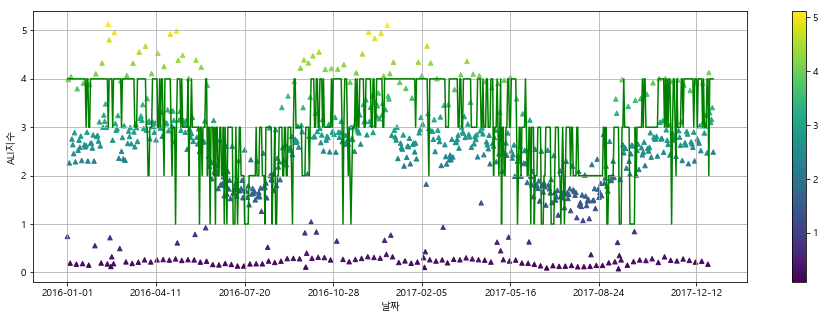

In [26]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('ALI지수') 
plt.colorbar() 
plt.grid() 
plt.show()

In [27]:
import pymysql

In [28]:
df.head(2)

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자
0,경상남도,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,3.368964,0.744
1,경상남도,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,3.466676,3.985


# 조건값

In [29]:
mtem3 = np.percentile(df['최저기온'], 5)
mtem2 = np.percentile(df['최저기온'], 25)
mtem1 = np.percentile(df['최저기온'], 60) 

mtem1 = float(round(mtem1, 2))
mtem2 = float(round(mtem2, 2))
mtem3 = float(round(mtem3, 2))
mtem1, mtem2, mtem3
Mtem = mtem1, mtem2, mtem3
Mtem

(11.9, -0.48, -7.15)

In [30]:
pha1 = np.percentile(df['기압'], 95) 
pha2 = np.percentile(df['기압'], 75) 
pha3 = np.percentile(df['기압'], 40) 

pha1 = float(round(pha1, 2))
pha2 = float(round(pha2, 2))
pha3 = float(round(pha3, 2))
pha1, pha2, pha3
Hpa = pha1, pha2, pha3
Hpa

(1025.05, 1018.9, 1010.36)

In [31]:
Oz1 = np.percentile(df['오존량'], 95)
Oz2 = np.percentile(df['오존량'], 75)
Oz3 = np.percentile(df['오존량'], 40) 

Oz1 = float(round(Oz1, 2))
Oz2 = float(round(Oz2, 2))
Oz3 = float(round(Oz3, 2))
Ozen = (399.23, 348.18, 310.8)
Ozen

(399.23, 348.18, 310.8)

In [32]:
ra1 = np.percentile(df['일교차'], 95)
ra2 = np.percentile(df['일교차'], 75)
ra3 = np.percentile(df['일교차'], 40) 

ra1 = float(round(ra1, 2))
ra2 = float(round(ra2, 2))
ra3 = float(round(ra3, 2))
ra1, ra2, ra3
Ran = (18.15, 14.7, 10.6)
Ran

(18.15, 14.7, 10.6)

In [33]:
hum1 = np.percentile(df['최소상대습도'], 5)
hum2 = np.percentile(df['최소상대습도'], 25)
hum3 = np.percentile(df['최소상대습도'], 60) 

hum1 = float(round(hum1, 2))
hum2 = float(round(hum2, 2))
hum3 = float(round(hum3, 2))
hump = hum1, hum2, hum3
hump

(23.27, 47.65, 68.0)

In [34]:
ALIif1 = np.percentile(df['ALI'], 5)
ALIif2 = np.percentile(df['ALI'], 25)
ALIif3 = np.percentile(df['ALI'], 60)

ALIif1 = float(round(ALIif1, 2))
ALIif2 = float(round(ALIif2, 2))
ALIif3 = float(round(ALIif3, 2))
ALIif = ALIif1, ALIif2, ALIif3
ALIif

(1.28, 1.67, 2.47)

# 가중치

In [35]:
temr = float(round(temr, 2))
hum = float(round(hum, 2))
oj = float(round(oj, 2))
atm = float(round(atm, 2))
mtem = float(round(mtem, 2))
temr, hum, oj, atm, mtem

(0.1, 0.14, 0.16, 0.28, 0.33)

In [36]:
class IfData:
    def __init__(self, num, metry, Maxtem1, Maxtem2, Maxtem3,Mintem1, Mintem2,Mintem3,Humi1, Humi2,Humi3,Hpa1,Hpa2,Hpa3, Ozone1,Ozone2,Ozone3, ALI1,ALI2,ALI3,temr, hum, oj, atm, mtem):
        self.num = num
        self.metry=metry
        self.Maxtem1 = Maxtem1
        self.Maxtem2 = Maxtem2
        self.Maxtem3 = Maxtem3
        self.Mintem1 = Mintem1
        self.Mintem2 = Mintem2
        self.Mintem3 = Mintem3
        self.Humi1 = Humi1
        self.Humi2 = Humi2
        self.Humi3 = Humi3
        self.Hpa1 = Hpa1
        self.Hpa2 = Hpa2
        self.Hpa3 = Hpa3
        self.Ozone1 = Ozone1
        self.Ozone2 = Ozone2
        self.Ozone3 = Ozone3
        self.ALI1 = ALI1
        self.ALI2 = ALI2
        self.ALI3 = ALI3
        self.temr = temr
        self.hum = hum
        self.oj = oj
        self.atm = atm
        self.mtem = mtem

In [77]:
pas = 'Allday12345!'
def update_test(data):
    conn = pymysql.connect(host='localhost', port = 8808, user='root', password=pas, db='webdb', charset='utf8')
    try:
        with conn.cursor() as curs:
            sql = 'UPDATE ifgeometry_2017_2018 set Maxtem1= %s,Maxtem2= %s,Maxtem3= %s, Mintem1= %s, Mintem2= %s, Mintem3= %s, Humi1= %s,Humi2= %s,Humi3= %s, Hpa1= %s, Hpa2= %s,Hpa3= %s,Ozone1= %s,Ozone2= %s,Ozone3= %s, ALI1= %s, ALI2= %s, ALI3= %s, whightMaxt= %s, whightMint= %s, WhightHumi= %s, whightHpa= %s, whightOzone= %s'\
            'WHERE geonum = %s'
            curs.execute(sql, (data.Maxtem1,data.Maxtem2,data.Maxtem3, data.Mintem1,data.Mintem2,data.Mintem3, data.Humi1, data.Humi2,data.Humi3,data.Hpa1,data.Hpa2,data.Hpa3, data.Ozone1,data.Ozone2,data.Ozone3, data.ALI1, data.ALI2, data.ALI3, data.temr, data.mtem, data.hum, data.atm, data.oj, 15))
        conn.commit()
    finally:
        conn.close()

In [38]:
pas = 'Allday12345!'
def insert_test(data):
    conn = pymysql.connect(host='localhost', port = 8808, user='root', password=pas, db='webdb', charset='utf8')
    try:
        with conn.cursor() as curs:
            sql = 'insert into ifgeometry_2017_2018 (geonum, geometry, Maxtem1,Maxtem2,Maxtem3, Mintem1, Mintem2, Mintem3, Humi1,Humi2,Humi3, Hpa1, Hpa2,Hpa3,Ozone1,Ozone2,Ozone3, ALI1, ALI2, ALI3, whightMaxt, whightMint, WhightHumi, whightHpa, WhightOzone)' \
            ' values (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'
            curs.execute(sql, (data.num, data.metry, data.Maxtem1,data.Maxtem2,data.Maxtem3, data.Mintem1,data.Mintem2,data.Mintem3, data.Humi1, data.Humi2,data.Humi3,data.Hpa1,data.Hpa2,data.Hpa3, data.Ozone1,data.Ozone2,data.Ozone3, data.ALI1, data.ALI2, data.ALI3, data.temr, data.mtem, data.hum, data.atm, data.oj))
        conn.commit()
    finally:
        conn.close()

In [72]:
pas = 'Allday12345!' 
num=0 
numb =[]
def check_test(): 
    global num
    global numb
    i=0
    conn = pymysql.connect(host='localhost', port = 8808, user='root', password=pas, db='webdb', charset='utf8') 
    try: 
        with conn.cursor(pymysql.cursors.DictCursor) as curs: 
            sql = 'select geonum from ifgeometry_2017_2018' 
            curs.execute("set names utf8") 
            curs.execute(sql) 
            row = curs.fetchall()
            numb = row 
    finally: 
        conn.close()   
    for i in range(0, 16):
        if numb[i]['geonum'] == 15:
            num = 15
    return num

In [78]:
if __name__ == "__main__" :   
    number = check_test()
    data = IfData(15, '경남', ra1, ra2, ra3, mtem1, mtem2, mtem3, hum1, hum2, hum3,pha1, pha2, pha3, Oz1,Oz2, Oz3, ALIif1, ALIif2, ALIif3, temr, hum, oj, atm, mtem) 
    if number == 0 : 
        insert_test(data)
    else  
        update_test(data)
    

fuck3


In [326]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')  
one1 = pd.read_csv("../data/datain/ojeon2015part1.csv",thousands=',', encoding='utf-8') 
one2 = pd.read_csv("../data/datain/ojeon2015part2.csv",thousands=',', encoding='utf-8') 
one3 = pd.read_csv("../data/datain/ojeon2015part3.csv",thousands=',', encoding='utf-8') 
one4 = pd.read_csv("../data/datain/ojeon2015part4.csv",thousands=',', encoding='utf-8') 

In [327]:
df1 = one1[["지역", "측정일시", "O3"]]
df2 = one2[["지역", "측정일시", "O3"]]
df3 = one3[["지역", "측정일시", "O3"]]
df4 = one4[["지역", "측정일시", "O3"]]
df1

,지역,측정일시,O3
0,강원 강릉시,2015010101,0.025
1,강원 강릉시,2015010102,0.023
2,강원 강릉시,2015010103,0.022
3,강원 강릉시,2015010104,0.021
4,강원 강릉시,2015010105,0.021
5,강원 강릉시,2015010106,0.020
6,강원 강릉시,2015010107,0.020
7,강원 강릉시,2015010108,0.018
8,강원 강릉시,2015010109,0.018
9,강원 강릉시,2015010110,0.019


In [336]:
df={'지역':[], '측정일시':[], 'O3':[]}
df = pd.DataFrame(df)
df

,지역,측정일시,O3
